In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import sys
import pickle
sys.path.append('../../')
print(sys.path)
import IPython.display as ipd
from tools.libaudio.utils import load
import numpy as np
from mlutils.utils import plot, plots
from models.mlmodeldic import best_model_path_and_settings
import torch
import time
from tts.Alternative.neuravoice import Vocoder
from tts.Alternative.train import train_vocoder
from tts.Alternative.dataset import NeuraVoiceDataset
from torch.utils.data import DataLoader, SubsetRandomSampler
from tools.libaudio.feature import melspectrogram
from tools.libaudio.display import show_spec, show_mel

['/var/Sources/experiments/core/tts/Alternative', '/home/kaz/anaconda3/envs/core/lib/python37.zip', '/home/kaz/anaconda3/envs/core/lib/python3.7', '/home/kaz/anaconda3/envs/core/lib/python3.7/lib-dynload', '', '/home/kaz/.local/lib/python3.7/site-packages', '/home/kaz/anaconda3/envs/core/lib/python3.7/site-packages', '/home/kaz/anaconda3/envs/core/lib/python3.7/site-packages/Mako-1.0.7-py3.7.egg', '/home/kaz/anaconda3/envs/core/lib/python3.7/site-packages/IPython/extensions', '/home/kaz/.ipython', '../../']


In [2]:
sample_index = 5
dataset = NeuraVoiceDataset(verbose=True)
sampler = SubsetRandomSampler([5])
loader = DataLoader(
    dataset, batch_size=1, shuffle=False, collate_fn=dataset.mel_to_wav, num_workers=1, sampler=sampler)
[d for d in loader]

[(tensor([[250., 253., 254.,  ..., 261., 262., 262.]]),
  tensor([[253., 254., 254.,  ..., 262., 262., 262.]]),
  tensor([[[4.3469e-01, 1.9852e-04, 3.2515e-05,  ..., 1.9618e-06,
            3.0190e-06, 4.4162e-06],
           [4.3450e-01, 1.9834e-04, 3.2570e-05,  ..., 1.9592e-06,
            3.0150e-06, 4.4102e-06],
           [4.3432e-01, 1.9816e-04, 3.2624e-05,  ..., 1.9566e-06,
            3.0109e-06, 4.4042e-06],
           ...,
           [2.6446e-02, 1.2582e-03, 2.6812e-03,  ..., 1.1479e-06,
            8.2006e-07, 2.7230e-07],
           [2.6420e-02, 1.2593e-03, 2.6823e-03,  ..., 1.1498e-06,
            8.2147e-07, 2.7275e-07],
           [2.6393e-02, 1.2604e-03, 2.6834e-03,  ..., 1.1517e-06,
            8.2288e-07, 2.7320e-07]]]))]

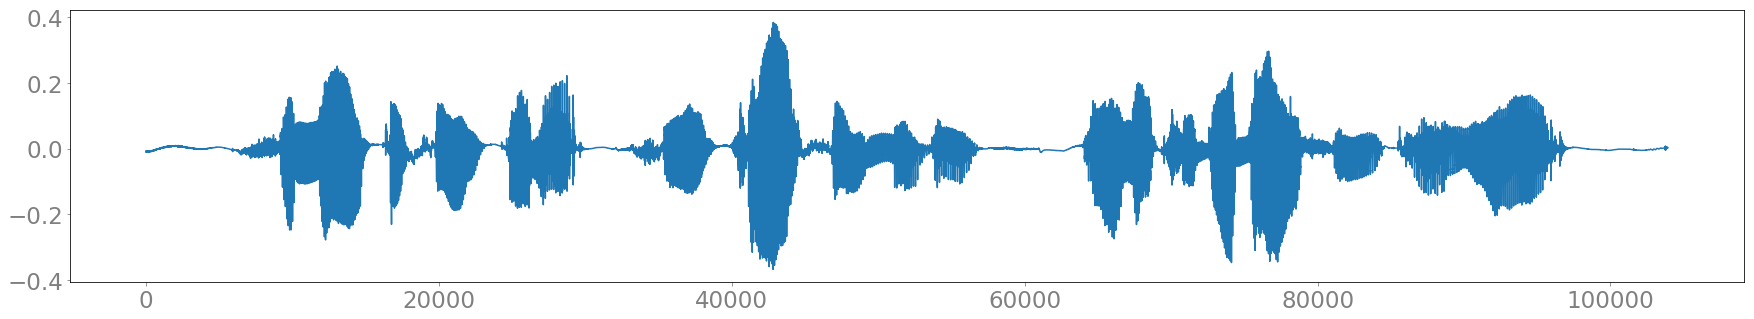

In [3]:
wav = dataset[sample_index]['wav']
plot(wav)

In [4]:
ipd.Audio(wav, rate=24000)

In [5]:
device = 'cuda:2'

In [6]:
model_name = 'vocoder_test_2'

In [7]:
model = Vocoder(hidden_size=512, device=device)

Trainable Parameters: 3.744 million


In [ ]:
losses, loss_aves, model = train_vocoder(
    model, loader, model_name=model_name, lr=1e-3, n_epoch=100, device=device, verbose=False, check_inference=True)

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 269. 281. 288.]]
loss 9.092724800109863
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 256. ... 310. 303. 294.]]
loss 9.079741477966309
samples [[456 456 456 ... 456 456 456]]
y [[256. 258. 256. ... 246. 238. 230.]]
loss 9.117889404296875
samples [[456 456 456 ... 456 456 456]]
y [[254. 255. 257. ... 231. 246. 261.]]
loss 9.1344575881958
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 258. ... 226. 221. 218.]]
loss 9.153908729553223
samples [[456 456 456 ... 456 456 456]]
y [[206. 202. 206. ... 264. 263. 262.]]
loss 9.16799259185791
samples [[456 456 456 ... 456 456 456]]
y [[236. 238. 241. ... 255. 255. 255.]]
loss 9.190773963928223
samples [[456 456 456 ... 456 456 456]]
y [[263. 264. 264. ... 259. 259. 259.]]
loss 9.310194969177246
samples [[456 456 456 ... 456 456 456]]
y [[232. 230. 230. ... 259. 259. 259.]]
loss 9.494478225708008
samples [[456 456 456 ... 456 456 456]]
y [[243. 242. 242. ... 254. 254. 253

samples [[456 456 456 ... 456 456 456]]
y [[264. 266. 268. ... 237. 235. 232.]]
loss 9.03819751739502
samples [[456 456 456 ... 456 456 456]]
y [[241. 246. 251. ... 261. 261. 260.]]
loss 9.035971641540527
samples [[456 456 456 ... 456 456 456]]
y [[240. 239. 239. ... 255. 255. 255.]]
loss 9.092080116271973
samples [[456 456 456 ... 456 456 456]]
y [[245. 246. 247. ... 254. 254. 254.]]
loss 9.089552879333496
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 274. 272. 271.]]
loss 9.087435722351074
samples [[456 456 456 ... 456 456 456]]
y [[245. 246. 246. ... 256. 256. 256.]]
loss 9.06220817565918
samples [[456 456 456 ... 456 456 456]]
y [[264. 264. 264. ... 250. 251. 253.]]
loss 9.086073875427246
samples [[456 456 456 ... 456 456 456]]
y [[264. 264. 265. ... 242. 243. 244.]]
loss 9.18558406829834
samples [[456 456 456 ... 456 456 456]]
y [[241. 239. 238. ... 258. 257. 257.]]
loss 9.2459716796875
samples [[456 456 456 ... 456 456 456]]
y [[275. 276. 276. ... 256. 256. 256.]

samples [[456 456 456 ... 456 456 456]]
y [[261. 259. 256. ... 253. 251. 248.]]
loss 8.903437614440918
samples [[456 456 456 ... 456 456 456]]
y [[269. 272. 273. ... 278. 277. 276.]]
loss 8.939852714538574
samples [[456 456 456 ... 456 456 456]]
y [[248. 248. 248. ... 214. 217. 222.]]
loss 8.972005844116211
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 259. ... 250. 250. 250.]]
loss 9.041705131530762
samples [[456 456 456 ... 456 456 456]]
y [[271. 270. 270. ... 295. 294. 290.]]
loss 9.101346015930176
samples [[456 456 456 ... 456 456 456]]
y [[266. 266. 265. ... 265. 266. 267.]]
loss 9.146683692932129
samples [[456 456 456 ... 456 456 456]]
y [[269. 269. 270. ... 263. 258. 254.]]
loss 9.157004356384277
samples [[456 456 456 ... 456 456 456]]
y [[236. 235. 234. ... 256. 257. 259.]]
loss 9.143950462341309
samples [[456 456 456 ... 456 456 456]]
y [[274. 274. 274. ... 256. 256. 256.]]
loss 9.157085418701172
samples [[456 456 456 ... 456 456 456]]
y [[261. 260. 258. ... 265. 264. 

samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 259. ... 258. 271. 285.]]
loss 9.106725692749023
samples [[456 456 456 ... 456 456 456]]
y [[251. 256. 256. ... 288. 292. 296.]]
loss 9.130995750427246
samples [[456 456 456 ... 456 456 456]]
y [[258. 259. 256. ... 267. 269. 270.]]
loss 9.157144546508789
samples [[456 456 456 ... 456 456 456]]
y [[269. 266. 264. ... 252. 250. 250.]]
loss 9.179688453674316
samples [[456 456 456 ... 456 456 456]]
y [[265. 263. 261. ... 261. 261. 260.]]
loss 9.178714752197266
samples [[456 456 456 ... 456 456 456]]
y [[267. 267. 268. ... 259. 259. 259.]]
loss 9.240324974060059
samples [[456 456 456 ... 456 456 456]]
y [[243. 244. 244. ... 259. 259. 259.]]
loss 9.428523063659668
samples [[456 456 456 ... 456 456 456]]
y [[275. 275. 276. ... 259. 260. 260.]]
loss 9.597482681274414
samples [[456 456 456 ... 456 456 456]]
y [[269. 269. 268. ... 262. 262. 260.]]
loss 9.662575721740723
samples [[456 456 456 ... 456 456 456]]
y [[283. 279. 271. ... 253. 252. 

samples [[456 456 456 ... 456 456 456]]
y [[275. 274. 273. ... 263. 264. 263.]]
loss 9.033642768859863
samples [[456 456 456 ... 456 456 456]]
y [[258. 264. 268. ... 256. 255. 256.]]
loss 9.042559623718262
samples [[456 456 456 ... 456 456 456]]
y [[255. 253. 250. ... 248. 248. 247.]]
loss 9.080944061279297
samples [[456 456 456 ... 456 456 456]]
y [[265. 264. 264. ... 254. 255. 255.]]
loss 9.09463882446289
samples [[456 456 456 ... 456 456 456]]
y [[236. 235. 235. ... 268. 270. 271.]]
loss 9.090653419494629
samples [[456 456 456 ... 456 456 456]]
y [[262. 262. 262. ... 262. 260. 259.]]
loss 9.060555458068848
samples [[456 456 456 ... 456 456 456]]
y [[258. 259. 260. ... 245. 242. 240.]]
loss 9.06376838684082
samples [[456 456 456 ... 456 456 456]]
y [[258. 257. 257. ... 266. 268. 268.]]
loss 9.182315826416016
samples [[456 456 456 ... 456 456 456]]
y [[265. 265. 265. ... 248. 246. 246.]]
loss 9.225966453552246
samples [[456 456 456 ... 456 456 456]]
y [[261. 260. 258. ... 260. 260. 26

samples [[456 456 456 ... 456 456 456]]
y [[247. 248. 248. ... 268. 271. 272.]]
loss 8.846525192260742
samples [[456 456 456 ... 456 456 456]]
y [[257. 258. 259. ... 253. 252. 251.]]
loss 8.876319885253906
samples [[456 456 456 ... 456 456 456]]
y [[261. 259. 256. ... 238. 236. 233.]]
loss 8.905807495117188
samples [[456 456 456 ... 456 456 456]]
y [[240. 242. 245. ... 266. 266. 265.]]
loss 8.939082145690918
samples [[456 456 456 ... 456 456 456]]
y [[257. 260. 262. ... 243. 242. 241.]]
loss 8.972709655761719
samples [[456 456 456 ... 456 456 456]]
y [[264. 263. 262. ... 267. 268. 270.]]
loss 9.033867835998535
samples [[456 456 456 ... 456 456 456]]
y [[261. 261. 262. ... 250. 246. 243.]]
loss 9.090156555175781
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 260. ... 264. 265. 266.]]
loss 9.140256881713867
samples [[456 456 456 ... 456 456 456]]
y [[245. 245. 244. ... 293. 293. 292.]]
loss 9.147787094116211
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 260. ... 271. 268. 

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 259. 260. 261.]]
loss 9.093032836914062
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 254. ... 236. 234. 235.]]
loss 9.066485404968262
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 258. ... 256. 274. 287.]]
loss 9.097578048706055
samples [[456 456 456 ... 456 456 456]]
y [[255. 254. 260. ... 298. 288. 281.]]
loss 9.136537551879883
samples [[456 456 456 ... 456 456 456]]
y [[258. 256. 255. ... 243. 249. 254.]]
loss 9.159022331237793
samples [[456 456 456 ... 456 456 456]]
y [[278. 277. 276. ... 213. 210. 205.]]
loss 9.177264213562012
samples [[456 456 456 ... 456 456 456]]
y [[273. 276. 278. ... 260. 261. 262.]]
loss 9.158016204833984
samples [[456 456 456 ... 456 456 456]]
y [[273. 274. 274. ... 257. 257. 257.]]
loss 9.174759864807129
samples [[456 456 456 ... 456 456 456]]
y [[261. 259. 256. ... 258. 258. 258.]]
loss 9.365507125854492
samples [[456 456 456 ... 456 456 456]]
y [[262. 262. 262. ... 259. 258. 

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 264. 264. 264.]]
loss 9.182183265686035
samples [[456 456 456 ... 456 456 456]]
y [[258. 260. 260. ... 248. 248. 249.]]
loss 9.11596965789795
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 266. 266. 266.]]
loss 9.059911727905273
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 242. 240. 238.]]
loss 9.032092094421387
samples [[456 456 456 ... 456 456 456]]
y [[243. 243. 244. ... 256. 257. 259.]]
loss 9.030792236328125
samples [[456 456 456 ... 456 456 456]]
y [[263. 263. 262. ... 256. 254. 254.]]
loss 9.040271759033203
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 258. ... 255. 255. 254.]]
loss 9.060946464538574
samples [[456 456 456 ... 456 456 456]]
y [[266. 266. 265. ... 253. 252. 252.]]
loss 9.08749008178711
samples [[456 456 456 ... 456 456 456]]
y [[256. 255. 255. ... 252. 253. 254.]]
loss 9.096504211425781
samples [[456 456 456 ... 456 456 456]]
y [[242. 243. 244. ... 273. 273. 27

samples [[456 456 456 ... 456 456 456]]
y [[259. 258. 258. ... 257. 256. 254.]]
loss 8.56856918334961
samples [[456 456 456 ... 456 456 456]]
y [[239. 242. 240. ... 266. 263. 261.]]
loss 8.545392036437988
samples [[456 456 456 ... 456 456 456]]
y [[250. 251. 251. ... 254. 255. 255.]]
loss 8.509808540344238
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 257. ... 267. 266. 266.]]
loss 8.427265167236328
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 259. 260. 261.]]
loss 8.626739501953125
samples [[456 456 456 ... 456 456 456]]
y [[263. 260. 260. ... 259. 260. 260.]]
loss 8.844903945922852
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 258. ... 241. 244. 245.]]
loss 8.847784996032715
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 274. 275. 275.]]
loss 8.869524002075195
samples [[456 456 456 ... 456 456 456]]
y [[253. 253. 254. ... 213. 215. 219.]]
loss 8.885120391845703
samples [[456 456 456 ... 456 456 456]]
y [[246. 246. 244. ... 272. 272. 2

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 256. 253. 250.]]
loss 9.088970184326172
samples [[456 456 456 ... 456 456 456]]
y [[259. 252. 252. ... 254. 258. 265.]]
loss 9.061388969421387
samples [[456 456 456 ... 456 456 456]]
y [[256. 259. 253. ... 263. 265. 267.]]
loss 9.091899871826172
samples [[456 456 456 ... 456 456 456]]
y [[260. 253. 257. ... 250. 253. 256.]]
loss 9.13120174407959
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 246. 249. 256.]]
loss 9.150849342346191
samples [[456 456 456 ... 456 456 456]]
y [[260. 265. 267. ... 262. 264. 262.]]
loss 9.189772605895996
samples [[456 456 456 ... 456 456 456]]
y [[215. 210. 202. ... 226. 230. 241.]]
loss 9.155182838439941
samples [[456 456 456 ... 456 456 456]]
y [[272. 271. 269. ... 254. 253. 253.]]
loss 9.180882453918457
samples [[456 456 456 ... 456 456 456]]
y [[260. 257. 255. ... 258. 259. 259.]]
loss 9.296051979064941
samples [[456 456 456 ... 456 456 456]]
y [[237. 239. 241. ... 259. 259. 2

samples [[456 456 456 ... 456 456 456]]
y [[271. 273. 271. ... 257. 257. 257.]]
loss 9.580833435058594
samples [[456 456 456 ... 456 456 456]]
y [[251. 251. 251. ... 262. 262. 261.]]
loss 9.3439302444458
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 257. ... 249. 249. 250.]]
loss 9.196776390075684
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 260. ... 266. 266. 265.]]
loss 9.107097625732422
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 253. 253. 252.]]
loss 9.07726764678955
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 258. 259. 259.]]
loss 9.033503532409668
samples [[456 456 456 ... 456 456 456]]
y [[249. 250. 252. ... 257. 258. 259.]]
loss 9.027423858642578
samples [[456 456 456 ... 456 456 456]]
y [[268. 267. 266. ... 257. 256. 254.]]
loss 9.029986381530762
samples [[456 456 456 ... 456 456 456]]
y [[265. 265. 264. ... 237. 240. 242.]]
loss 9.04128360748291
samples [[456 456 456 ... 456 456 456]]
y [[254. 255. 255. ... 250. 250. 251.

samples [[456 456 456 ... 456 456 456]]
y [[253. 251. 250. ... 252. 253. 253.]]
loss 8.74036979675293
samples [[456 456 456 ... 456 456 456]]
y [[259. 260. 260. ... 263. 264. 262.]]
loss 8.703286170959473
samples [[456 456 456 ... 456 456 456]]
y [[246. 245. 244. ... 266. 273. 278.]]
loss 8.659599304199219
samples [[456 456 456 ... 456 456 456]]
y [[262. 262. 261. ... 221. 220. 222.]]
loss 8.57332706451416
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 222. 224. 232.]]
loss 8.549386024475098
samples [[456 456 456 ... 456 456 456]]
y [[265. 266. 266. ... 262. 263. 263.]]
loss 8.535901069641113
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 260. ... 270. 270. 270.]]
loss 8.482104301452637
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 257. ... 257. 256. 256.]]
loss 8.402458190917969
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 264. 263. 263.]]
loss 8.644765853881836
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 256. ... 253. 254. 25

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 276. 276. 276.]]
loss 9.079232215881348
samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 256. ... 249. 243. 239.]]
loss 9.066004753112793
samples [[456 456 456 ... 456 456 456]]
y [[255. 256. 256. ... 203. 216. 232.]]
loss 9.07855224609375
samples [[456 456 456 ... 456 456 456]]
y [[252. 259. 260. ... 263. 256. 250.]]
loss 9.120677947998047
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 257. ... 263. 272. 275.]]
loss 9.148805618286133
samples [[456 456 456 ... 456 456 456]]
y [[273. 275. 277. ... 243. 244. 242.]]
loss 9.188899993896484
samples [[456 456 456 ... 456 456 456]]
y [[286. 282. 280. ... 253. 253. 251.]]
loss 9.166842460632324
samples [[456 456 456 ... 456 456 456]]
y [[242. 242. 241. ... 259. 259. 259.]]
loss 9.160884857177734
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 251. ... 258. 258. 258.]]
loss 9.226855278015137
samples [[456 456 456 ... 456 456 456]]
y [[233. 231. 230. ... 259. 259. 2

samples [[209 209 209 ... 456 456 456]]
y [[255. 258. 261. ... 245. 243. 241.]]
loss 9.831904411315918
samples [[456 456 456 ... 456 456 456]]
y [[265. 269. 272. ... 230. 227. 225.]]
loss 9.768829345703125
samples [[456 456 456 ... 456 456 456]]
y [[276. 277. 277. ... 263. 264. 265.]]
loss 9.586050033569336
samples [[456 456 456 ... 456 456 456]]
y [[250. 250. 250. ... 245. 245. 245.]]
loss 9.332257270812988
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 255. ... 265. 266. 266.]]
loss 9.203932762145996
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 258. ... 263. 262. 262.]]
loss 9.139418601989746
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 255. ... 247. 247. 247.]]
loss 9.095550537109375
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 253. 253. 253.]]
loss 9.030014991760254
samples [[456 456 456 ... 456 456 456]]
y [[257. 264. 268. ... 268. 265. 262.]]
loss 9.023407936096191
samples [[456 456 456 ... 456 456 456]]
y [[267. 264. 259. ... 264. 265. 

samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 256. ... 261. 261. 260.]]
loss 9.0831937789917
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 260. ... 257. 257. 257.]]
loss 9.117497444152832
samples [[456 456 456 ... 456 456 456]]
y [[256. 259. 258. ... 256. 256. 256.]]
loss 8.876425743103027
samples [[456 456 456 ... 456 456 456]]
y [[261. 261. 260. ... 258. 261. 262.]]
loss 8.737492561340332
samples [[456 456 456 ... 456 456 456]]
y [[261. 260. 259. ... 265. 264. 262.]]
loss 8.723316192626953
samples [[456 456 456 ... 456 456 456]]
y [[263. 263. 262. ... 263. 263. 262.]]
loss 8.691706657409668
samples [[456 456 456 ... 456 456 456]]
y [[246. 247. 248. ... 265. 265. 265.]]
loss 8.648762702941895
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 265. 265. 265.]]
loss 8.568217277526855
samples [[456 456 456 ... 456 456 456]]
y [[262. 262. 263. ... 259. 259. 258.]]
loss 8.556408882141113
samples [[456 456 456 ... 456 456 456]]
y [[266. 266. 267. ... 256. 256. 25

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 262. 262. 262.]]
loss 9.08606243133545
samples [[456 456 456 ... 456 456 456]]
y [[253. 256. 255. ... 259. 260. 261.]]
loss 9.06249713897705
samples [[456 456 456 ... 456 456 456]]
y [[259. 257. 256. ... 301. 307. 307.]]
loss 9.074902534484863
samples [[456 456 456 ... 456 456 456]]
y [[255. 259. 253. ... 249. 263. 277.]]
loss 9.104435920715332
samples [[456 456 456 ... 456 456 456]]
y [[256. 259. 256. ... 279. 276. 271.]]
loss 9.147611618041992
samples [[456 456 456 ... 456 456 456]]
y [[242. 242. 242. ... 261. 251. 243.]]
loss 9.191874504089355
samples [[456 456 456 ... 456 456 456]]
y [[259. 262. 265. ... 263. 265. 267.]]
loss 9.178732872009277
samples [[456 456 456 ... 456 456 456]]
y [[243. 246. 248. ... 264. 263. 261.]]
loss 9.139732360839844
samples [[456 456 456 ... 456 456 456]]
y [[249. 246. 245. ... 255. 255. 255.]]
loss 9.218829154968262
samples [[456 456 456 ... 456 456 456]]
y [[252. 249. 246. ... 258. 258. 25

samples [[456 456 456 ... 456 456 456]]
y [[276. 274. 270. ... 256. 256. 256.]]
loss 9.968406677246094
samples [[456 456 456 ... 456 456 456]]
y [[320. 306. 289. ... 257. 258. 258.]]
loss 9.977964401245117
samples [[456 456 456 ... 456 456 456]]
y [[229. 263. 295. ... 256. 257. 258.]]
loss 9.956303596496582
samples [[456 456 456 ... 456 456 456]]
y [[234. 232. 231. ... 272. 272. 271.]]
loss 9.921945571899414
samples [[209 209 209 ... 456 456 456]]
y [[276. 278. 275. ... 262. 263. 264.]]
loss 9.852675437927246
samples [[456 456 456 ... 456 456 456]]
y [[269. 266. 263. ... 246. 249. 252.]]
loss 9.7839994430542
samples [[456 456 456 ... 456 456 456]]
y [[262. 261. 264. ... 268. 268. 267.]]
loss 9.593324661254883
samples [[456 456 456 ... 456 456 456]]
y [[254. 254. 254. ... 244. 244. 245.]]
loss 9.340654373168945
samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 262. 262. 263.]]
loss 9.200639724731445
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 257. ... 265. 265. 26

samples [[456 456 456 ... 456 456 456]]
y [[278. 274. 270. ... 260. 261. 261.]]
loss 9.066448211669922
samples [[456 456 456 ... 456 456 456]]
y [[221. 215. 210. ... 263. 263. 264.]]
loss 9.068572044372559
samples [[456 456 456 ... 456 456 456]]
y [[274. 276. 274. ... 245. 244. 242.]]
loss 9.088409423828125
samples [[456 456 456 ... 456 456 456]]
y [[218. 222. 221. ... 239. 239. 241.]]
loss 9.1270112991333
samples [[456 456 456 ... 456 456 456]]
y [[264. 264. 263. ... 255. 256. 256.]]
loss 9.10360050201416
samples [[456 456 456 ... 456 456 456]]
y [[258. 254. 255. ... 253. 254. 255.]]
loss 9.073247909545898
samples [[456 456 456 ... 456 456 456]]
y [[258. 254. 256. ... 248. 249. 248.]]
loss 9.073899269104004
samples [[456 456 456 ... 456 456 456]]
y [[256. 260. 258. ... 257. 257. 257.]]
loss 9.086827278137207
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 259. ... 256. 256. 256.]]
loss 8.941091537475586
samples [[456 456 456 ... 456 456 456]]
y [[259. 260. 258. ... 256. 256. 257

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 

samples [[456 456 456 ... 456 456 456]]
y [[278. 280. 281. ... 269. 270. 270.]]
loss 9.355640411376953
samples [[456 456 456 ... 102 102 102]]
y [[270. 270. 270. ... 261. 262. 263.]]
loss 9.326939582824707
samples [[149 149 149 ... 456 456 456]]
y [[251. 250. 250. ... 258. 256. 256.]]
loss 9.33957576751709
samples [[ 94  94  94 ... 456 456 456]]
y [[251. 251. 249. ... 259. 259. 258.]]
loss 9.237133026123047
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 252. ... 259. 259. 259.]]
loss 9.034358024597168
samples [[165 165 165 ... 456 456 456]]
y [[258. 258. 258. ... 259. 259. 259.]]
loss 9.116767883300781
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 259. ... 258. 258. 258.]]
loss 9.282283782958984
samples [[456 456 456 ... 456 456 456]]
y [[238. 235. 232. ... 257. 257. 256.]]
loss 9.360479354858398
samples [[456 456 456 ... 456 456 456]]
y [[273. 270. 267. ... 237. 238. 236.]]
loss 9.331022262573242
samples [[456 456 456 ... 456 456 456]]
y [[278. 278. 276. ... 270. 271. 2

samples [[456 456 456 ... 456 456 456]]
y [[263. 266. 269. ... 254. 254. 253.]]
loss 9.268150329589844
samples [[456 456 456 ... 456 456 456]]
y [[266. 267. 268. ... 256. 256. 256.]]
loss 9.277215003967285
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 255. 255. 255.]]
loss 9.271987915039062
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 256. 256. 256.]]
loss 8.961495399475098
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 257. ... 256. 256. 256.]]
loss 8.62347412109375
samples [[456 456 456 ... 456 456 456]]
y [[250. 252. 252. ... 256. 256. 256.]]
loss 8.315631866455078
samples [[456 456 456 ... 456 456 456]]
y [[275. 275. 274. ... 256. 256. 256.]]
loss 8.029719352722168
samples [[456 456 456 ... 456 456 456]]
y [[241. 241. 238. ... 256. 256. 256.]]
loss 7.728687286376953
samples [[456 456 456 ... 456 456 456]]
y [[259. 258. 258. ... 256. 256. 256.]]
loss 7.448587417602539
samples [[456 456 456 ... 456 456 456]]
y [[252. 253. 254. ... 256. 256. 2

samples [[456 456 456 ... 456 456 456]]
y [[247. 248. 248. ... 274. 273. 273.]]
loss 8.829296112060547
samples [[456 456 456 ... 456 456 456]]
y [[255. 256. 256. ... 248. 249. 249.]]
loss 8.840620994567871
samples [[456 456 456 ... 456 456 456]]
y [[265. 265. 265. ... 275. 275. 274.]]
loss 8.85693073272705
samples [[456 456 456 ... 456 456 456]]
y [[253. 251. 250. ... 252. 252. 251.]]
loss 8.908071517944336
samples [[456 456 456 ... 456 456 456]]
y [[273. 272. 270. ... 257. 255. 252.]]
loss 8.935617446899414
samples [[456 456 456 ... 456 456 456]]
y [[237. 236. 235. ... 220. 218. 216.]]
loss 8.973997116088867
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 256. ... 214. 217. 222.]]
loss 9.021004676818848
samples [[456 456 456 ... 456 456 456]]
y [[259. 258. 257. ... 283. 289. 293.]]
loss 9.08407211303711
samples [[456 456 456 ... 456 456 456]]
y [[258. 257. 256. ... 278. 273. 269.]]
loss 9.151505470275879
samples [[456 456 456 ... 456 456 456]]
y [[247. 245. 244. ... 239. 238. 23

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 242. 243. 244.]]
loss 9.082320213317871
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 251. ... 244. 244. 243.]]
loss 9.05777359008789
samples [[456 456 456 ... 456 456 456]]
y [[258. 256. 255. ... 243. 253. 260.]]
loss 9.060160636901855
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 261. ... 265. 267. 271.]]
loss 9.094215393066406
samples [[456 456 456 ... 456 456 456]]
y [[257. 254. 258. ... 261. 276. 293.]]
loss 9.13243579864502
samples [[456 456 456 ... 456 456 456]]
y [[240. 238. 239. ... 260. 254. 245.]]
loss 9.164352416992188
samples [[456 456 456 ... 456 456 456]]
y [[273. 272. 270. ... 222. 233. 248.]]
loss 9.191798210144043
samples [[456 456 456 ... 456 456 456]]
y [[275. 276. 277. ... 249. 251. 251.]]
loss 9.153614044189453
samples [[456 456 456 ... 456 456 456]]
y [[230. 230. 230. ... 259. 260. 260.]]
loss 9.156166076660156
samples [[456 456 456 ... 456 456 456]]
y [[273. 273. 272. ... 260. 260. 26

samples [[456 456 456 ... 456 456 456]]
y [[249. 255. 258. ... 256. 255. 253.]]
loss 10.01695442199707
samples [[456 456 456 ... 456 456 456]]
y [[278. 277. 275. ... 256. 256. 256.]]
loss 10.050662994384766
samples [[456 456 456 ... 456 456 456]]
y [[264. 256. 251. ... 258. 257. 256.]]
loss 10.006818771362305
samples [[456 456 456 ... 456 456 456]]
y [[276. 270. 266. ... 256. 256. 256.]]
loss 10.022363662719727
samples [[456 456 456 ... 456 456 456]]
y [[309. 286. 265. ... 257. 257. 257.]]
loss 9.997138023376465
samples [[456 456 456 ... 456 456 456]]
y [[264. 266. 267. ... 276. 276. 275.]]
loss 9.956196784973145
samples [[209 209 209 ... 456 456 456]]
y [[248. 252. 254. ... 251. 254. 256.]]
loss 9.899128913879395
samples [[456 456 456 ... 456 456 456]]
y [[234. 231. 231. ... 224. 223. 223.]]
loss 9.810259819030762
samples [[456 456 456 ... 456 456 456]]
y [[278. 278. 276. ... 254. 255. 255.]]
loss 9.661663055419922
samples [[456 456 456 ... 456 456 456]]
y [[251. 251. 251. ... 256. 25

samples [[456 456 456 ... 456 456 456]]
y [[244. 243. 243. ... 263. 261. 262.]]
loss 9.350601196289062
samples [[456 456 456 ... 456 456 456]]
y [[261. 261. 261. ... 261. 261. 259.]]
loss 9.28836441040039
samples [[456 456 456 ... 456 456 456]]
y [[242. 239. 236. ... 257. 256. 261.]]
loss 9.252455711364746
samples [[456 456 456 ... 456 456 456]]
y [[222. 238. 252. ... 258. 256. 261.]]
loss 9.219830513000488
samples [[456 456 456 ... 456 456 456]]
y [[321. 318. 310. ... 260. 256. 256.]]
loss 9.175895690917969
samples [[456 456 456 ... 456 456 456]]
y [[278. 294. 311. ... 257. 256. 256.]]
loss 9.074179649353027
samples [[456 456 456 ... 456 456 456]]
y [[276. 275. 267. ... 236. 238. 240.]]
loss 9.062612533569336
samples [[456 456 456 ... 456 456 456]]
y [[250. 246. 240. ... 258. 258. 258.]]
loss 9.057236671447754
samples [[456 456 456 ... 456 456 456]]
y [[270. 269. 265. ... 261. 261. 261.]]
loss 9.072498321533203
samples [[456 456 456 ... 456 456 456]]
y [[217. 214. 219. ... 264. 264. 2

y [[270. 269. 268. 267. 266. 264. 263. 262. 260. 258. 256. 255. 254. 254.
  253. 252. 252. 252. 252. 252. 253. 254. 255. 256. 256. 257. 258. 259.
  260. 260. 261. 261. 262. 262. 261. 261. 261. 260. 260. 260. 260. 259.
  259. 259. 258. 258. 258. 257. 257. 256. 256. 256. 256. 255. 254. 253.
  252. 251. 250. 249. 248. 248. 247. 246. 246. 245. 245. 245. 246. 246.
  246. 246. 247. 248. 248. 249. 250. 250. 250. 251. 252. 252. 252. 252.
  253. 254. 254. 255. 255. 256. 256. 257. 258. 258. 259. 260. 260. 261.
  261. 261. 262. 262. 261. 261. 260. 259. 259. 258. 257. 256. 256. 255.
  255. 254. 254. 254. 254. 254. 254. 254. 255. 255. 256. 256. 256. 257.
  257. 258. 258. 259. 259. 259. 259. 259. 259. 260. 260. 259. 260. 260.
  260. 260. 260. 260. 260. 261. 261. 261. 261. 261. 261. 261. 261. 261.
  261. 260. 260. 260. 259. 258. 258. 257. 257. 257. 256. 256. 256. 256.
  256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
  256. 256. 256. 255. 254. 254. 253. 252. 252. 251. 249. 249. 

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456]]
y [[249. 248. 249. 248. 249. 249. 249. 250. 251. 252. 252. 253. 253. 253.
  254. 255. 255. 255. 256. 256. 256. 257. 258. 258. 259. 260. 261. 263.
  263. 264. 264. 264. 265. 265. 264. 263. 262. 261. 260. 258. 257. 256.
  254. 252. 251. 250. 249. 248. 248. 247. 248. 248. 249. 250. 251. 252.
  253. 255. 256. 257. 258. 258. 259. 260. 260. 261. 261. 260. 260. 260.
  260. 260. 259. 259. 259. 259. 259. 258. 258. 258. 258. 258. 258. 257.
  257. 256. 256. 256. 255. 254. 253. 253. 252. 251. 251. 251. 251. 251.
  251. 251

samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 252. ... 257. 258. 258.]]
loss 9.622894287109375
samples [[456 456 456 ... 456 456 456]]
y [[264. 265. 265. ... 256. 258. 257.]]
loss 9.781466484069824
samples [[456 456 456 ... 456 456 456]]
y [[262. 263. 264. ... 260. 254. 250.]]
loss 9.798233985900879
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 264. 267. 251.]]
loss 9.789956092834473
samples [[456 456 456 ... 456 456 456]]
y [[227. 236. 243. ... 283. 286. 290.]]
loss 9.77224063873291
samples [[456 456 456 ... 456 456 456]]
y [[276. 274. 274. ... 277. 286. 287.]]
loss 9.791871070861816
samples [[456 456 456 ... 456 456 456]]
y [[250. 248. 246. ... 265. 259. 255.]]
loss 9.756178855895996
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 218. 215. 217.]]
loss 9.743698120117188
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 266. 262. 256.]]
loss 9.720542907714844
samples [[456 456 456 ... 209 209 209]]
y [[258. 258. 257. ... 224. 231. 2

samples [[456 456 456 ... 456 456 456]]
y [[225. 223. 226. ... 257. 259. 259.]]
loss 9.640983581542969
samples [[456 456 456 ... 428 428 428]]
y [[259. 259. 259. ... 288. 286. 280.]]
loss 9.64867877960205
samples [[456 456 456 ... 209 209 209]]
y [[255. 254. 255. ... 268. 265. 259.]]
loss 9.709715843200684
samples [[456 456 456 ... 456 456 456]]
y [[259. 254. 251. ... 210. 218. 218.]]
loss 9.747037887573242
samples [[456 456 456 ... 456 456 456]]
y [[259. 255. 257. ... 283. 283. 284.]]
loss 9.86471176147461
samples [[456 456 456 ... 456 456 456]]
y [[262. 253. 246. ... 252. 252. 251.]]
loss 9.915861129760742
samples [[456 456 456 ... 456 456 456]]
y [[250. 242. 249. ... 247. 247. 248.]]
loss 9.831979751586914
samples [[456 456 456 ... 456 456 456]]
y [[246. 244. 243. ... 257. 256. 256.]]
loss 9.749991416931152
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 260. ... 260. 258. 258.]]
loss 9.75212287902832
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 259. 261. 262

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 274. 273. 273.]]
loss 9.077142715454102
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 252. ... 267. 270. 272.]]
loss 9.051029205322266
samples [[456 456 456 ... 456 456 456]]
y [[252. 256. 253. ... 271. 275. 277.]]
loss 9.056812286376953
samples [[456 456 456 ... 456 456 456]]
y [[258. 253. 260. ... 291. 289. 285.]]
loss 9.080049514770508
samples [[456 456 456 ... 456 456 456]]
y [[258. 255. 257. ... 244. 244. 246.]]
loss 9.107808113098145
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 255. ... 279. 278. 275.]]
loss 9.15970230102539
samples [[456 456 456 ... 456 456 456]]
y [[236. 239. 240. ... 216. 215. 213.]]
loss 9.199435234069824
samples [[456 456 456 ... 456 456 456]]
y [[266. 271. 279. ... 236. 226. 221.]]
loss 9.179241180419922
samples [[456 456 456 ... 456 456 456]]
y [[261. 262. 262. ... 266. 265. 260.]]
loss 9.143365859985352
samples [[456 456 456 ... 456 456 456]]
y [[274. 274. 274. ... 249. 248. 2

samples [[456 456 456 ... 209 209 209]]
y [[258. 258. 258. ... 282. 275. 266.]]
loss 9.598355293273926
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 248. 248. 245.]]
loss 9.487337112426758
samples [[456 456 456 ... 456 456 456]]
y [[257. 255. 258. ... 255. 251. 251.]]
loss 9.487004280090332
samples [[456 456 456 ... 456 456 456]]
y [[260. 252. 253. ... 273. 273. 272.]]
loss 9.74101734161377
samples [[456 456 456 ... 456 456 456]]
y [[254. 248. 251. ... 251. 252. 253.]]
loss 9.971674919128418
samples [[456 456 456 ... 456 456 456]]
y [[257. 262. 264. ... 256. 256. 256.]]
loss 10.098214149475098
samples [[456 456 456 ... 456 456 456]]
y [[227. 230. 236. ... 263. 262. 261.]]
loss 10.067049980163574
samples [[456 456 456 ... 456 456 456]]
y [[239. 230. 222. ... 256. 256. 256.]]
loss 10.052445411682129
samples [[456 456 456 ... 456 456 456]]
y [[224. 234. 249. ... 259. 259. 258.]]
loss 10.030908584594727
samples [[456 456 456 ... 456 456 456]]
y [[270. 270. 270. ... 228. 22

samples [[456 456 456 ... 456 456 456]]
y [[278. 281. 281. ... 227. 232. 237.]]
loss 9.756660461425781
samples [[456 456 456 ... 456 456 456]]
y [[251. 250. 249. ... 220. 214. 207.]]
loss 9.752782821655273
samples [[456 456 456 ... 456 456 456]]
y [[249. 248. 248. ... 269. 267. 263.]]
loss 9.735810279846191
samples [[456 456 456 ... 456 456 456]]
y [[253. 255. 254. ... 257. 256. 261.]]
loss 9.701272010803223
samples [[428 428 428 ... 456 456 456]]
y [[259. 262. 261. ... 265. 281. 298.]]
loss 9.689818382263184
samples [[209 209 209 ... 456 456 456]]
y [[299. 296. 293. ... 261. 266. 271.]]
loss 9.62652587890625
samples [[456 456 456 ... 456 456 456]]
y [[247. 247. 245. ... 275. 279. 278.]]
loss 9.564549446105957
samples [[456 456 456 ... 456 456 456]]
y [[247. 249. 250. ... 274. 270. 267.]]
loss 9.447050094604492
samples [[456 456 456 ... 456 456 456]]
y [[248. 248. 249. ... 262. 260. 257.]]
loss 9.348904609680176
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 260. ... 258. 261. 2

  254. 255. 256. 256. 257. 259. 260. 260. 261. 261. 262. 262. 262.]]
loss 8.827845573425293
samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 273. 274. 275.]]
loss 9.078390121459961
samples [[456 456 456 ... 456 456 456]]
y [[253. 257. 254. ... 240. 241. 243.]]
loss 9.053085327148438
samples [[456 456 456 ... 456 456 456]]
y [[252. 257. 253. ... 222. 220. 220.]]
loss 9.059951782226562
samples [[456 456 456 ... 456 456 456]]
y [[256. 261. 258. ... 233. 224. 216.]]
loss 9.072993278503418
samples [[456 456 456 ... 456 456 456]]
y [[255. 257. 257. ... 228. 221. 217.]]
loss 9.096979141235352
samples [[456 456 456 ... 456 456 456]]
y [[261. 258. 257. ... 223. 222. 222.]]
loss 9.150834083557129
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 253. ... 219. 216. 210.]]
loss 9.19937515258789
samples [[456 456 456 ... 456 456 456]]
y [[243. 242. 241. ... 260. 274. 294.]]
loss 9.18297004699707
samples [[456 456 456 ... 456 456 456]]
y [[263. 263. 264. ... 244. 239. 239.]]
loss 9

samples [[456 456 456 ... 456 456 456]]
y [[264. 263. 261. ... 291. 295. 292.]]
loss 9.792302131652832
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 249. 248.]]
loss 9.741006851196289
samples [[456 456 456 ... 456 456 456]]
y [[257. 258. 258. ... 286. 314. 337.]]
loss 9.712970733642578
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 253. 253. 253.]]
loss 9.604676246643066
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 266. 263. 260.]]
loss 9.470511436462402
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 257. ... 254. 252. 249.]]
loss 9.443406105041504
samples [[456 456 456 ... 456 456 456]]
y [[265. 244. 251. ... 264. 267. 269.]]
loss 9.648747444152832
samples [[456 456 456 ... 456 456 456]]
y [[238. 256. 271. ... 251. 251. 250.]]
loss 9.901437759399414
samples [[456 456 456 ... 456 456 456]]
y [[258. 254. 252. ... 254. 254. 255.]]
loss 10.10543441772461
samples [[456 456 456 ... 456 456 456]]
y [[239. 245. 254. ... 256. 256. 

samples [[456 456 456 ... 209 209 209]]
y [[255. 255. 255. ... 252. 254. 252.]]
loss 9.698198318481445
samples [[456 456 456 ... 456 456 456]]
y [[255. 260. 257. ... 250. 244. 235.]]
loss 9.750645637512207
samples [[456 456 456 ... 456 456 456]]
y [[260. 262. 256. ... 256. 251. 244.]]
loss 9.868538856506348
samples [[456 456 456 ... 456 456 456]]
y [[251. 260. 263. ... 261. 262. 262.]]
loss 9.904390335083008
samples [[456 456 456 ... 456 456 456]]
y [[253. 259. 262. ... 264. 264. 264.]]
loss 9.83308219909668
samples [[456 456 456 ... 456 456 456]]
y [[232. 234. 233. ... 268. 268. 268.]]
loss 9.772836685180664
samples [[456 456 456 ... 456 456 456]]
y [[258. 259. 258. ... 275. 271. 267.]]
loss 9.759881019592285
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 259. ... 269. 281. 296.]]
loss 9.747061729431152
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 260. ... 260. 263. 267.]]
loss 9.713847160339355
samples [[428 428 428 ... 456 456 456]]
y [[258. 261. 264. ... 257. 261. 2

y [[248. 249. 250. 250. 252. 253. 254. 255. 256. 256. 256. 257. 258. 258.
  259. 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 269. 269. 269.
  270. 269. 268. 267. 266. 264. 263. 262. 260. 258. 256. 255. 254. 254.
  253. 252. 252. 252. 252. 252. 253. 254. 255. 256. 256. 257. 258. 259.
  260. 260. 261. 261. 262. 262. 261. 261. 261. 260. 260. 260. 260. 259.
  259. 259. 258. 258. 258. 257. 257. 256. 256. 256. 256. 255. 254. 253.
  252. 251. 250. 249. 248. 248. 247. 246. 246. 245. 245. 245. 246. 246.
  246. 246. 247. 248. 248. 249. 250. 250. 250. 251. 252. 252. 252. 252.
  253. 254. 254. 255. 255. 256. 256. 257. 258. 258. 259. 260. 260. 261.
  261. 261. 262. 262. 261. 261. 260. 259. 259. 258. 257. 256. 256. 255.
  255. 254. 254. 254. 254. 254. 254. 254. 255. 255. 256. 256. 256. 257.
  257. 258. 258. 259. 259. 259. 259. 259. 259. 260. 260. 259. 260. 260.
  260. 260. 260. 260. 260. 261. 261. 261. 261. 261. 261. 261. 261. 261.
  261. 260. 260. 260. 259. 258. 258. 257. 257. 257. 256. 256. 

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 271. 271. 272.]]
loss 9.07664966583252
samples [[456 456 456 ... 456 456 456]]
y [[252. 258. 253. ... 236. 233. 232.]]
loss 9.049418449401855
samples [[456 456 456 ... 456 456 456]]
y [[251. 256. 252. ... 277. 277. 277.]]
loss 9.0523099899292
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 256. ... 295. 296. 295.]]
loss 9.077872276306152
samples [[456 456 456 ... 456 456 456]]
y [[260. 252. 256. ... 226. 224. 228.]]
loss 9.079133033752441
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 256. ... 303. 289. 275.]]
loss 9.127738952636719
samples [[456 456 456 ... 456 456 456]]
y [[245. 240. 237. ... 268. 284. 303.]]
loss 9.201143264770508
samples [[456 456 456 ... 456 456 456]]
y [[270. 266. 263. ... 245. 259. 272.]]
loss 9.184917449951172
samples [[456 456 456 ... 456 456 456]]
y [[271. 270. 269. ... 287. 294. 291.]]
loss 9.158677101135254
samples [[456 456 456 ... 456 456 456]]
y [[262. 260. 258. ... 252. 250. 252

samples [[456 456 456 ... 456 456 456]]
y [[238. 242. 243. ... 282. 283. 280.]]
loss 9.83212947845459
samples [[456 456 456 ... 456 456 456]]
y [[246. 246. 246. ... 205. 189. 176.]]
loss 9.796814918518066
samples [[456 456 456 ... 456 456 456]]
y [[260. 261. 259. ... 241. 238. 229.]]
loss 9.736452102661133
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 256. ... 271. 257. 248.]]
loss 9.715164184570312
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 277. 277. 276.]]
loss 9.600235939025879
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 259. 260. 259.]]
loss 9.455185890197754
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 258. ... 221. 221. 221.]]
loss 9.416769027709961
samples [[456 456 456 ... 456 456 456]]
y [[244. 251. 267. ... 270. 275. 274.]]
loss 9.604487419128418
samples [[456 456 456 ... 456 456 456]]
y [[239. 260. 272. ... 255. 256. 256.]]
loss 9.857826232910156
samples [[456 456 456 ... 456 456 456]]
y [[254. 256. 258. ... 254. 255. 2

samples [[456 456 456 ... 456 456 456]]
y [[261. 260. 258. ... 253. 253. 254.]]
loss 9.626469612121582
samples [[456 456 456 ... 456 456 456]]
y [[251. 252. 252. ... 256. 257. 257.]]
loss 9.664612770080566
samples [[456 456 456 ... 428 428 428]]
y [[256. 256. 256. ... 240. 234. 234.]]
loss 9.697249412536621
samples [[456 456 456 ... 209 209 209]]
y [[254. 253. 256. ... 195. 192. 209.]]
loss 9.693751335144043
samples [[456 456 456 ... 456 456 456]]
y [[255. 249. 256. ... 244. 235. 233.]]
loss 9.75797176361084
samples [[456 456 456 ... 456 456 456]]
y [[242. 250. 270. ... 270. 272. 274.]]
loss 9.877981185913086
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 252. ... 254. 254. 255.]]
loss 9.89343547821045
samples [[456 456 456 ... 456 456 456]]
y [[235. 234. 236. ... 255. 256. 256.]]
loss 9.827353477478027
samples [[456 456 456 ... 456 456 456]]
y [[257. 258. 257. ... 254. 255. 255.]]
loss 9.788524627685547
samples [[456 456 456 ... 456 456 456]]
y [[248. 248. 248. ... 276. 274. 27

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 

samples [[456 456 456 ... 456 456 456]]
y [[270. 270. 269. ... 260. 261. 261.]]
loss 9.212008476257324
samples [[456 456 456 ... 456 456 456]]
y [[240. 238. 237. ... 258. 258. 258.]]
loss 9.114859580993652
samples [[456 456 456 ... 456 456 456]]
y [[228. 228. 229. ... 256. 256. 256.]]
loss 8.943180084228516
samples [[456 456 456 ... 456 456 456]]
y [[246. 245. 244. ... 256. 256. 256.]]
loss 8.632857322692871
samples [[456 456 456 ... 456 456 456]]
y [[257. 256. 256. ... 256. 256. 256.]]
loss 8.323230743408203
samples [[456 456 456 ... 456 456 456]]
y [[281. 281. 279. ... 256. 256. 256.]]
loss 8.030219078063965
samples [[456 456 456 ... 456 456 456]]
y [[235. 234. 232. ... 256. 256. 256.]]
loss 7.949428081512451
samples [[456 456 456 ... 456 456 456]]
y [[256. 254. 252. ... 256. 256. 256.]]
loss 7.640697956085205
samples [[456 456 456 ... 456 456 456]]
y [[308. 306. 298. ... 255. 255. 255.]]
loss 7.360937595367432
samples [[456 456 456 ... 456 456 456]]
y [[263. 260. 256. ... 256. 256. 

samples [[456 456 456 ... 456 456 456]]
y [[269. 269. 269. ... 256. 256. 256.]]
loss 7.368037223815918
samples [[456 456 456 ... 456 456 456]]
y [[248. 249. 255. ... 256. 256. 256.]]
loss 7.074285507202148
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 259. ... 256. 256. 256.]]
loss 6.785205364227295
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 252. ... 256. 256. 256.]]
loss 6.462766647338867
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 256. 256.]]
loss 6.1953349113464355
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 255. 255.]]
loss 6.197278022766113
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 255.]]
loss 6.606844902038574
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 255.]]
loss 6.67788028717041
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 255.]]
loss 7.089089870452881
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 246. 246. 245.]]
loss 8.642032623291016
samples [[456 456 456 ... 456 456 456]]
y [[263. 260. 260. ... 257. 257. 258.]]
loss 8.781733512878418
samples [[456 456 456 ... 456 456 456]]
y [[246. 245. 244. ... 263. 264. 265.]]
loss 8.753286361694336
samples [[456 456 456 ... 456 456 456]]
y [[266. 266. 266. ... 256. 256. 256.]]
loss 8.791417121887207
samples [[456 456 456 ... 456 456 456]]
y [[243. 241. 238. ... 258. 258. 259.]]
loss 8.811344146728516
samples [[456 456 456 ... 456 456 456]]
y [[250. 247. 245. ... 265. 264. 263.]]
loss 8.827902793884277
samples [[456 456 456 ... 456 456 456]]
y [[264. 262. 259. ... 240. 241. 242.]]
loss 8.871551513671875
samples [[456 456 456 ... 456 456 456]]
y [[273. 272. 270. ... 253. 254. 255.]]
loss 8.90836238861084
samples [[456 456 456 ... 456 456 456]]
y [[251. 251. 251. ... 280. 282. 283.]]
loss 8.966947555541992
samples [[456 456 456 ... 456 456 456]]
y [[241. 246. 250. ... 276. 272. 2

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456]]
y [[258. 258. 258. 257. 257. 257. 257. 257. 257. 256. 256. 256. 256. 256.
  256. 256. 256. 256. 256. 256. 256. 256. 256. 255. 255. 255. 255. 254.
  254. 253. 253. 253. 252. 252. 251. 251. 250. 249

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 257. ... 257. 256. 256.]]
loss 6.876732349395752
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 254.]]
loss 7.1880903244018555
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 254. 253.]]
loss 7.497524261474609
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 251. 252. 254.]]
loss 7.81525182723999
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 257. ... 255. 254. 255.]]
loss 8.055778503417969
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 256. 257.]]
loss 8.200275421142578
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 266. 266. 266.]]
loss 8.498117446899414
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 229. 234. 238.]]
loss 8.676372528076172
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 263. 264. 263.]]
loss 8.876493453979492
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 277. 276. 

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 255.]]
loss 7.667538166046143
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 256. 256.]]
loss 7.894037246704102
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 257. 257. 257.]]
loss 8.041669845581055
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 258. 258. 258.]]
loss 8.465383529663086
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 250. 250. 251.]]
loss 8.911725044250488
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 257. 257. 257.]]
loss 9.273557662963867
samples [[456 456 456 ... 456 456 456]]
y [[254. 254. 254. ... 243. 250. 256.]]
loss 9.425227165222168
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 262. 260. 258.]]
loss 9.416361808776855
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 262. 258. 256.]]
loss 9.560132026672363
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 262. 268. 

samples [[456 456 456 ... 456 456 456]]
y [[260. 258. 257. ... 239. 238. 234.]]
loss 8.948670387268066
samples [[456 456 456 ... 456 456 456]]
y [[273. 274. 276. ... 266. 262. 258.]]
loss 8.989882469177246
samples [[456 456 456 ... 456 456 456]]
y [[273. 272. 272. ... 272. 269. 265.]]
loss 9.019379615783691
samples [[456 456 456 ... 456 456 456]]
y [[254. 256. 256. ... 271. 270. 269.]]
loss 9.06116771697998
samples [[456 456 456 ... 456 456 456]]
y [[266. 267. 266. ... 245. 248. 252.]]
loss 9.11585807800293
samples [[456 456 456 ... 456 456 456]]
y [[271. 271. 270. ... 217. 216. 215.]]
loss 9.132430076599121
samples [[456 456 456 ... 456 456 456]]
y [[249. 247. 247. ... 253. 252. 250.]]
loss 9.151063919067383
samples [[456 456 456 ... 456 456 456]]
y [[260. 261. 262. ... 285. 280. 274.]]
loss 9.165346145629883
samples [[456 456 456 ... 456 456 456]]
y [[269. 268. 268. ... 270. 271. 271.]]
loss 9.160443305969238
samples [[456 456 456 ... 456 456 456]]
y [[242. 240. 238. ... 243. 244. 24

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 

samples [[456 456 456 ... 456 456 456]]
y [[258. 253. 248. ... 271. 271. 271.]]
loss 9.782966613769531
samples [[456 456 456 ... 149 149 149]]
y [[271. 267. 263. ... 248. 248. 248.]]
loss 9.7539644241333
samples [[456 456 456 ...  94  94  94]]
y [[258. 258. 259. ... 248. 247. 247.]]
loss 9.884171485900879
samples [[456 456 456 ...  94  94  94]]
y [[254. 253. 253. ... 252. 253. 255.]]
loss 10.005866050720215
samples [[456 456 456 ... 165 165 165]]
y [[258. 258. 258. ... 258. 259. 259.]]
loss 10.111357688903809
samples [[456 456 456 ... 165 165 165]]
y [[258. 258. 258. ... 256. 256. 256.]]
loss 9.967011451721191
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 259. ... 258. 258. 258.]]
loss 9.755659103393555
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 261. ... 260. 259. 257.]]
loss 9.593573570251465
samples [[456 456 456 ... 456 456 456]]
y [[290. 290. 288. ... 286. 284. 281.]]
loss 9.545669555664062
samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 258. ... 268. 270. 

samples [[456 456 456 ... 456 456 456]]
y [[236. 232. 229. ... 254. 252. 253.]]
loss 10.172591209411621
samples [[456 456 456 ... 456 456 456]]
y [[215. 213. 217. ... 256. 256. 256.]]
loss 10.177786827087402
samples [[456 456 456 ... 456 456 456]]
y [[235. 231. 226. ... 256. 256. 256.]]
loss 10.175406455993652
samples [[456 456 456 ... 456 456 456]]
y [[254. 251. 250. ... 258. 258. 258.]]
loss 10.128803253173828
samples [[456 456 456 ... 456 456 456]]
y [[266. 263. 261. ... 254. 254. 254.]]
loss 10.065970420837402
samples [[209 209 209 ... 456 456 456]]
y [[266. 258. 255. ... 251. 248. 245.]]
loss 10.017861366271973
samples [[456 456 456 ... 456 456 456]]
y [[280. 283. 284. ... 277. 281. 284.]]
loss 9.965177536010742
samples [[456 456 456 ... 456 456 456]]
y [[257. 261. 262. ... 267. 264. 260.]]
loss 9.786847114562988
samples [[456 456 456 ... 456 456 456]]
y [[268. 267. 270. ... 255. 253. 250.]]
loss 9.545488357543945
samples [[456 456 456 ... 456 456 456]]
y [[254. 254. 253. ... 257.

samples [[456 456 456 ... 456 456 456]]
y [[264. 249. 250. ... 230. 221. 225.]]
loss 9.784968376159668
samples [[456 456 456 ... 456 456 456]]
y [[263. 262. 249. ... 253. 255. 256.]]
loss 9.876675605773926
samples [[456 456 456 ... 456 456 456]]
y [[245. 249. 246. ... 245. 245. 245.]]
loss 9.835217475891113
samples [[456 456 456 ... 456 456 456]]
y [[280. 277. 280. ... 255. 254. 254.]]
loss 9.815546989440918
samples [[456 456 456 ... 456 456 456]]
y [[248. 248. 250. ... 264. 264. 265.]]
loss 9.810293197631836
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 260. ... 286. 283. 278.]]
loss 9.78642463684082
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 252. ... 259. 258. 256.]]
loss 9.769221305847168
samples [[456 456 456 ... 456 456 456]]
y [[250. 251. 251. ... 212. 228. 246.]]
loss 9.740758895874023
samples [[428 428 428 ... 456 456 456]]
y [[276. 276. 279. ... 238. 243. 250.]]
loss 9.751802444458008
samples [[209 209 209 ... 456 456 456]]
y [[249. 245. 244. ... 213. 220. 2

y [[256. 257. 258. 259. 260. 260. 261. 261. 262. 262. 261. 261. 261. 260.
  260. 260. 260. 259. 259. 259. 258. 258. 258. 257. 257. 256. 256. 256.
  256. 255. 254. 253. 252. 251. 250. 249. 248. 248. 247. 246. 246. 245.
  245. 245. 246. 246. 246. 246. 247. 248. 248. 249. 250. 250. 250. 251.
  252. 252. 252. 252. 253. 254. 254. 255. 255. 256. 256. 257. 258. 258.
  259. 260. 260. 261. 261. 261. 262. 262. 261. 261. 260. 259. 259. 258.
  257. 256. 256. 255. 255. 254. 254. 254. 254. 254. 254. 254. 255. 255.
  256. 256. 256. 257. 257. 258. 258. 259. 259. 259. 259. 259. 259. 260.
  260. 259. 260. 260. 260. 260. 260. 260. 260. 261. 261. 261. 261. 261.
  261. 261. 261. 261. 261. 260. 260. 260. 259. 258. 258. 257. 257. 257.
  256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256. 256.
  256. 256. 256. 256. 256. 256. 256. 255. 254. 254. 253. 252. 252. 251.
  249. 249. 247. 246. 245. 243. 241. 240. 238. 236. 235. 233. 232. 233.
  235. 235. 238. 240. 242. 246. 251. 256. 258. 262. 264. 270. 

samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 274. 273. 272.]]
loss 9.07905387878418
samples [[456 456 456 ... 456 456 456]]
y [[254. 256. 252. ... 272. 273. 275.]]
loss 9.044387817382812
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 274. 275. 276.]]
loss 9.039216995239258
samples [[456 456 456 ... 456 456 456]]
y [[259. 259. 254. ... 270. 269. 268.]]
loss 9.04282283782959
samples [[456 456 456 ... 456 456 456]]
y [[258. 256. 263. ... 246. 256. 266.]]
loss 9.059730529785156
samples [[456 456 456 ... 456 456 456]]
y [[257. 255. 258. ... 289. 285. 278.]]
loss 9.085555076599121
samples [[456 456 456 ... 456 456 456]]
y [[263. 265. 265. ... 222. 219. 216.]]
loss 9.129176139831543
samples [[456 456 456 ... 456 456 456]]
y [[276. 275. 273. ... 273. 288. 297.]]
loss 9.19864273071289
samples [[456 456 456 ... 456 456 456]]
y [[277. 273. 267. ... 254. 248. 242.]]
loss 9.179357528686523
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 260. ... 260. 274. 280

samples [[456 456 456 ... 456 456 456]]
y [[256. 255. 255. ... 263. 262. 262.]]
loss 9.165486335754395
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 258. ... 258. 257. 258.]]
loss 9.265769958496094
samples [[456 456 456 ... 456 456 456]]
y [[233. 235. 236. ... 257. 257. 257.]]
loss 9.388229370117188
samples [[456 456 456 ... 456 456 456]]
y [[273. 273. 273. ... 258. 258. 258.]]
loss 9.60340690612793
samples [[456 456 456 ... 456 456 456]]
y [[262. 261. 263. ... 258. 258. 257.]]
loss 9.798107147216797
samples [[456 456 456 ... 456 456 456]]
y [[243. 246. 243. ... 256. 253. 260.]]
loss 9.904282569885254
samples [[456 456 456 ... 456 456 456]]
y [[262. 262. 263. ... 248. 255. 268.]]
loss 9.888147354125977
samples [[456 456 456 ... 456 456 456]]
y [[271. 274. 278. ... 258. 255. 248.]]
loss 9.889060974121094
samples [[456 456 456 ... 456 456 456]]
y [[227. 228. 231. ... 281. 285. 285.]]
loss 9.880776405334473
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 251. 258. 2

samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 256. 251. 249.]]
loss 9.406962394714355
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 267. 268. 269.]]
loss 9.4855318069458
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 257. ... 267. 266. 266.]]
loss 9.654582023620605
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 273. 274. 274.]]
loss 9.5039644241333
samples [[456 456 456 ... 456 456 456]]
y [[260. 260. 260. ... 222. 224. 231.]]
loss 9.316784858703613
samples [[456 456 456 ... 456 456 456]]
y [[232. 234. 237. ... 254. 253. 254.]]
loss 9.260933876037598
samples [[456 456 456 ... 456 456 456]]
y [[245. 244. 244. ... 244. 242. 241.]]
loss 9.274864196777344
samples [[456 456 456 ... 456 456 456]]
y [[256. 253. 249. ... 239. 237. 234.]]
loss 9.304868698120117
samples [[456 456 456 ... 456 456 456]]
y [[257. 262. 267. ... 261. 261. 261.]]
loss 9.327947616577148
samples [[456 456 456 ... 456 456 456]]
y [[242. 244. 245. ... 255. 255. 255.

samples [[456 456 456 ... 456 456 456]]
y [[268. 268. 268. ... 271. 270. 268.]]
loss 9.14283561706543
samples [[456 456 456 ... 456 456 456]]
y [[246. 244. 243. ... 237. 238. 238.]]
loss 9.1614408493042
samples [[456 456 456 ... 456 456 456]]
y [[248. 248. 250. ... 270. 270. 270.]]
loss 9.16154670715332
samples [[456 456 456 ... 456 456 456]]
y [[232. 231. 227. ... 278. 272. 268.]]
loss 9.15927791595459
samples [[456 456 456 ... 456 456 456]]
y [[270. 271. 273. ... 250. 249. 249.]]
loss 9.158919334411621
samples [[456 456 456 ... 456 456 456]]
y [[206. 209. 212. ... 241. 241. 241.]]
loss 9.147220611572266
samples [[456 456 456 ... 456 456 456]]
y [[272. 270. 270. ... 272. 272. 271.]]
loss 9.16476058959961
samples [[456 456 456 ... 456 456 456]]
y [[215. 213. 213. ... 257. 258. 258.]]
loss 9.177885055541992
samples [[456 456 456 ... 456 456 456]]
y [[283. 284. 286. ... 262. 262. 262.]]
loss 9.148322105407715
samples [[456 456 456 ... 456 456 456]]
y [[230. 228. 227. ... 262. 262. 262.]]

  259. 260. 260. 261. 261. 262. 262. 262.]]
loss 8.824081420898438
samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456]]
y [[259. 260. 260. 261. 261. 260. 260. 260. 260. 260. 259. 259. 259. 259.
  259. 258. 258. 258. 258. 258. 258. 257. 257. 256. 256. 256. 255. 254.
  253. 253. 252. 251. 251. 251. 251. 251. 251. 251. 252. 253. 254. 255.
  256. 256. 257. 259. 260. 260. 261. 261. 262. 262. 262.]]
loss 9.519488334655762
samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 260. 258. 256.]]
loss 9.08798599243164
samples [[456 456 456 ... 456 456 456]]
y [[254. 256. 253. ... 272. 273. 274.]]
loss 9.037961959838867
samples [[456 456 456 ... 456 456 456]]
y [[253. 259. 254. ... 272. 272. 273.]]
loss 9.029165267944336
samples [[456 456 456 ... 456 456 456]]
y [[254. 257. 258. ... 275. 275. 276.]]
loss 9.0519132614

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 261. 260. 259.]]
loss 8.68692398071289
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 226. 233. 230.]]
loss 8.76874828338623
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 274. 274. 275.]]
loss 9.030792236328125
samples [[456 456 456 ... 456 456 456]]
y [[255. 256. 256. ... 261. 260. 259.]]
loss 9.189285278320312
samples [[456 456 456 ... 456 456 456]]
y [[252. 252. 251. ... 242. 241. 243.]]
loss 9.188498497009277
samples [[456 456 456 ... 456 456 456]]
y [[254. 253. 251. ... 256. 257. 256.]]
loss 9.164070129394531
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 258. ... 279. 281. 279.]]
loss 9.15878963470459
samples [[456 456 456 ... 456 456 456]]
y [[253. 254. 254. ... 246. 245. 244.]]
loss 9.159930229187012
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 256. 256.]]
loss 9.146587371826172
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 257. 257

samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 255. 255. 255.]]
loss 7.926284313201904
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 256. 256. 256.]]
loss 8.016009330749512
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 257. 257. 257.]]
loss 8.257841110229492
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 258. 258. 258.]]
loss 8.698564529418945
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 259. 259. 259.]]
loss 9.13676929473877
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 259. 258. 257.]]
loss 9.49335765838623
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 231. 226. 220.]]
loss 9.374678611755371
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 253. 258. 264.]]
loss 9.574860572814941
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 213. 206. 204.]]
loss 9.529664039611816
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 255. ... 259. 259. 26

samples [[456 456 456 ... 456 456 456]]
y [[260. 259. 258. ... 265. 265. 265.]]
loss 8.7686767578125
samples [[456 456 456 ... 456 456 456]]
y [[238. 237. 234. ... 258. 260. 260.]]
loss 8.77931022644043
samples [[456 456 456 ... 456 456 456]]
y [[252. 251. 249. ... 262. 262. 263.]]
loss 8.80174732208252
samples [[456 456 456 ... 456 456 456]]
y [[267. 270. 272. ... 251. 253. 254.]]
loss 8.838825225830078
samples [[456 456 456 ... 456 456 456]]
y [[244. 245. 246. ... 273. 274. 275.]]
loss 8.872039794921875
samples [[456 456 456 ... 456 456 456]]
y [[270. 269. 267. ... 235. 240. 241.]]
loss 8.925970077514648
samples [[456 456 456 ... 456 456 456]]
y [[242. 241. 239. ... 279. 278. 279.]]
loss 8.979528427124023
samples [[456 456 456 ... 456 456 456]]
y [[274. 273. 272. ... 217. 216. 213.]]
loss 9.016606330871582
samples [[456 456 456 ... 456 456 456]]
y [[259. 260. 261. ... 254. 258. 262.]]
loss 9.057058334350586
samples [[456 456 456 ... 456 456 456]]
y [[253. 250. 251. ... 268. 266. 265.

samples [[456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456 456
  456 456 456 456 456 456 456 

samples [[ 94  94  94 ... 456 456 456]]
y [[253. 253. 253. ... 267. 269. 271.]]
loss 9.259599685668945
samples [[456 456 456 ... 456 456 456]]
y [[254. 255. 255. ... 235. 234. 233.]]
loss 9.03842830657959
samples [[165 165 165 ... 456 456 456]]
y [[258. 258. 258. ... 242. 243. 244.]]
loss 8.93411922454834
samples [[165 165 165 ... 456 456 456]]
y [[255. 254. 254. ... 249. 249. 250.]]
loss 8.995353698730469
samples [[456 456 456 ... 456 456 456]]
y [[257. 257. 257. ... 256. 256. 256.]]
loss 9.012757301330566
samples [[456 456 456 ... 456 456 456]]
y [[289. 290. 289. ... 258. 258. 258.]]
loss 9.08830738067627
samples [[456 456 456 ... 456 456 456]]
y [[261. 263. 265. ... 259. 259. 259.]]
loss 9.201210975646973
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 258. ... 258. 258. 258.]]
loss 9.347232818603516
samples [[456 456 456 ... 456 456 456]]
y [[228. 233. 238. ... 258. 258. 258.]]
loss 9.468598365783691
samples [[456 456 456 ... 456 456 456]]
y [[256. 257. 259. ... 256. 256. 257

samples [[456 456 456 ... 456 456 456]]
y [[254. 254. 254. ... 264. 267. 267.]]
loss 9.321462631225586
samples [[456 456 456 ... 456 456 456]]
y [[254. 254. 254. ... 252. 252. 251.]]
loss 9.150230407714844
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 257. ... 252. 252. 253.]]
loss 9.141729354858398
samples [[456 456 456 ... 456 456 456]]
y [[256. 256. 256. ... 245. 244. 243.]]
loss 9.14642333984375
samples [[456 456 456 ... 456 456 456]]
y [[258. 258. 256. ... 265. 265. 265.]]
loss 9.228023529052734
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 254. ... 250. 249. 248.]]
loss 9.248477935791016
samples [[456 456 456 ... 456 456 456]]
y [[255. 255. 254. ... 264. 264. 265.]]
loss 9.201802253723145
samples [[456 456 456 ... 456 456 456]]
y [[232. 234. 239. ... 263. 262. 262.]]
loss 9.086413383483887
samples [[456 456 456 ... 456 456 456]]
y [[234. 236. 240. ... 249. 249. 249.]]
loss 9.027026176452637
samples [[456 456 456 ... 456 456 456]]
y [[244. 242. 240. ... 272. 273. 2